# Big Data & Policing

**HW 3**

This Python Notebook includes solution to the Part 1 of the HW3.

Created by **Saksham Gupta (20161090)**

In [1]:
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

In [2]:
def draw_roc_curve( ground_truth, predictions, pos_label=True):
    fpr, tpr, thresholds = roc_curve(ground_truth, predictions, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right", fontsize='x-large')
    plt.show()
    return roc_auc

In [3]:
FILENAME_DATASET = 'savry_2017.csv'

df = pd.read_csv(FILENAME_DATASET, sep='\t', index_col=False)
df1 = pd.read_csv(FILENAME_DATASET, sep='\t', index_col=False)
df2 = pd.read_csv(FILENAME_DATASET, sep='\t', index_col=False)
df2.head()

,gender,nationality,main_crime_age,criminal_records,main_crime_category,main_crime_is_violent,risk01_previous_violence,risk02_history_nonviolent_offences,risk03_early_violence_before_14,risk04_past_intervention_fail,...,sum_social_risk_items,sum_individual_risk_items,sum_all_risk_items,sum_all_protective_items,professional_risk_evaluation,recidivism,recidivism_number_offences,recidividm_category_first_offence,recidivism_violence_first_offence,recidivism_severity
0,Male,Spanish,17,1 or 2 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,3,5,12,1,Low,No,0,Not applicable,Not applicable,0
1,Male,Spanish,17,3 to 5 criminal records,Against persons,Violent,Moderate,Moderate,Low,Moderate,...,5,6,19,4,Moderate,Yes,1,Others,No violent,1
2,Male,Foreigner,16,1 or 2 criminal records,Nonviolent against property,No violent,Low,Low,Low,Low,...,4,1,9,3,Low,No,0,Not applicable,Not applicable,0
3,Male,Spanish,17,0 criminal records,Against persons,Violent,Low,Low,Low,Low,...,1,5,9,2,High,No,0,Not applicable,Not applicable,0
4,Male,Spanish,16,3 to 5 criminal records,Nonviolent against property,No violent,Moderate,Moderate,Low,Low,...,2,2,13,0,Moderate,No,0,Not applicable,Not applicable,0


# Question 1

In [4]:
risk_eval_list = list(df['professional_risk_evaluation'])
sum_all_risk_list = list(df['sum_all_risk_items'])

dict_correlation = {}

for i in range(len(sum_all_risk_list)):
    if risk_eval_list[i] not in dict_correlation.keys():
        dict_correlation[risk_eval_list[i]] = []

for i in range(len(risk_eval_list)):
    dict_correlation[risk_eval_list[i]].append(sum_all_risk_list[i])
    
avgLow = sum(dict_correlation['Low']) / len(dict_correlation['Low'])
avgMid = sum(dict_correlation['Moderate']) / len(dict_correlation['Moderate'])
avgHigh = sum(dict_correlation['High']) / len(dict_correlation['High'])

In [5]:
print("Average Savry Score for people with Low risk evaluation: ", avgLow)
print("Average Savry Score for people with Moderate risk evaluation: ", avgMid)
print("Average Savry Score for people with high risk evaluation: ", avgHigh)

Average Savry Score for people with Low risk evaluation:  9.071651090342678
Average Savry Score for people with Moderate risk evaluation:  17.604712041884817
Average Savry Score for people with high risk evaluation:  25.34013605442177


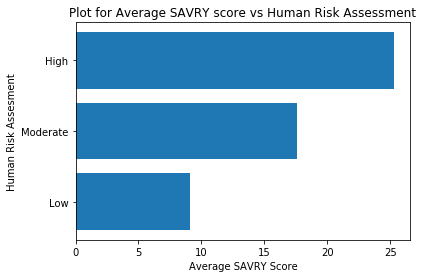

In [6]:
ave_score_list = [avgLow, avgMid, avgHigh]
risk_eval_list = ['Low', 'Moderate', 'High']
y_pos = np.arange(len(risk_eval_list))
plt.barh(y_pos ,ave_score_list, align='center')
plt.yticks(y_pos, risk_eval_list)
plt.ylabel('Human Risk Assesment')
plt.xlabel('Average SAVRY Score')
plt.title('Plot for Average SAVRY score vs Human Risk Assessment')
plt.show()

We could see that Average SAVRY score is higher for Higher human risk assessment. Thus we could say that Average score is directly proporstional to Risk Evaluation.

# Question 2

In [7]:
dataset = df.values
train, test = train_test_split(df, test_size=0.33)
lst_crime_cat = list(test['main_crime_category'])

In [8]:
risk_factor_columns = ["risk01_previous_violence", "risk02_history_nonviolent_offences",
                       "risk03_early_violence_before_14", "risk04_past_intervention_fail",
                       "risk05_self_harm_suicide_attempts", "risk06_violence_at_home",
                       "risk07_childhood_mistreatment", "risk08_criminal_parent_caregiver",
                       "risk09_early_separation_parents", "risk10_poor_school_achievement", 
                       "risk11_delinquency_peer_group", "risk12_rejection_peer_group",
                       "risk13_poor_stress_coping", "risk14_poor_parental_skills_parents",
                       "risk15_lack_of_personal_social_support", "risk16_marginalized_environment",
                       "risk17_negative_attitudes", "risk18_risk_taker_impulsive",
                       "risk19_drug_abuse", "risk20_anger_management_issues",
                       "risk21_low_empaty", "risk22_attention_deficit",
                       "risk23_poor_compliance_interventions", "risk24_low_commitment_school"]
demographic_columns = ["gender", "nationality", "main_crime_age", "criminal_records",
                       "main_crime_category", "main_crime_is_violent"]
protective_factor_columns = ["protective01_prosocial_activities", "protective02_strong_social_support",
                             "protective03_strong_link_prosocial_adult", "protective04_positive_attitude_interventions",
                             "protective05_high_commitment_school_or_work", "protective06_perseverant_personality"]


factors = demographic_columns + risk_factor_columns + protective_factor_columns

In [9]:
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism"]

test_X = pd.get_dummies(test[factors])
test_y = test["recidivism"]

In [10]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

In [11]:
pred_logistic = model.predict(test_X)
accuracy = accuracy_score(test_y,pred_logistic)
print("Accuracy from Logistic Regression: ", accuracy)

Accuracy from Logistic Regression:  0.7402135231316725


In [12]:
crime_cat_dict = {}
for i in lst_crime_cat:
    if i in crime_cat_dict.keys():
        crime_cat_dict[i] += 1
    else:
        crime_cat_dict[i] = 1

for i in crime_cat_dict:
    count = 0
    acc = 0
    for j,key in enumerate(lst_crime_cat):
        if key == i:
            if test_y.values[j] == pred_logistic[j]:
                count += 1
    acc = count / crime_cat_dict[i]
    crime_cat_dict[i] = acc
    
sorted_crime_dict = sorted(crime_cat_dict.items(), key=operator.itemgetter(1))

In [13]:
print("List of crimes sorted according to the accuracy of the current model")
print(sorted_crime_dict)

List of crimes sorted according to the accuracy of the current model
[('Violent against property', 0.6578947368421053), ('Others', 0.7073170731707317), ('Against persons', 0.7640449438202247), ('Nonviolent against property', 0.8133333333333334)]


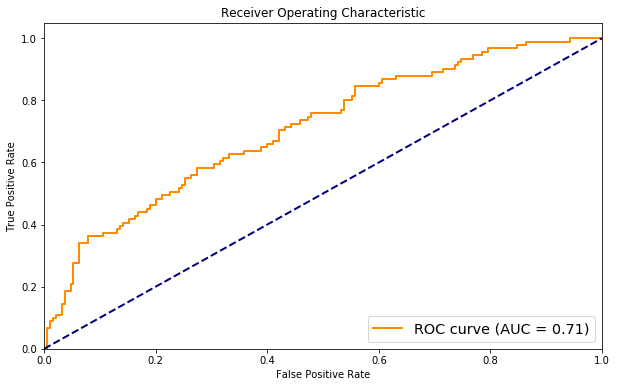

In [14]:
test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

The top 3 offenses predicted least accurately by the current model are:
1. Violent against property
2. Others
3. Nonviolent against property

# Question 3

In [15]:
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism_severity"]

test_X = pd.get_dummies(test[factors])
test_y = test["recidivism_severity"]

model = LogisticRegression(solver='liblinear', multi_class="auto")
model.fit(train_X, train_y)

predALL_y = model.predict_proba(test_X)[:,1]

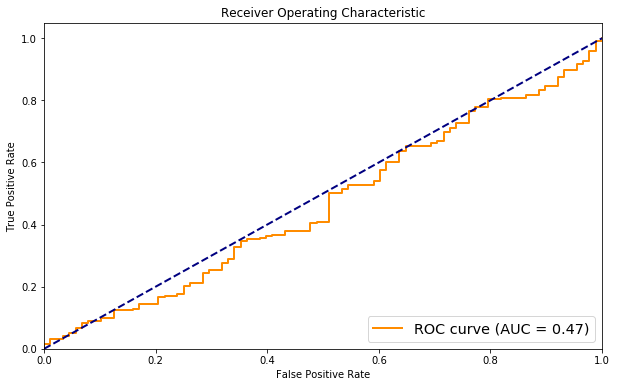

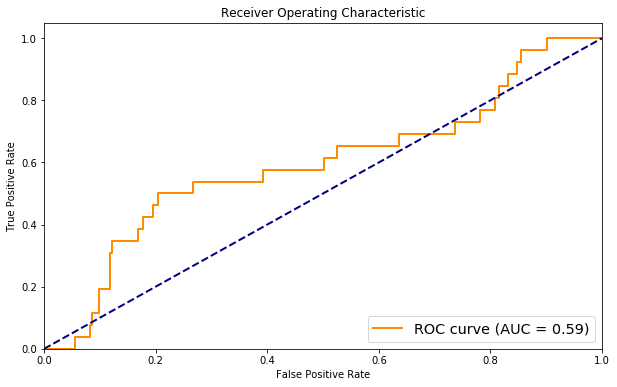

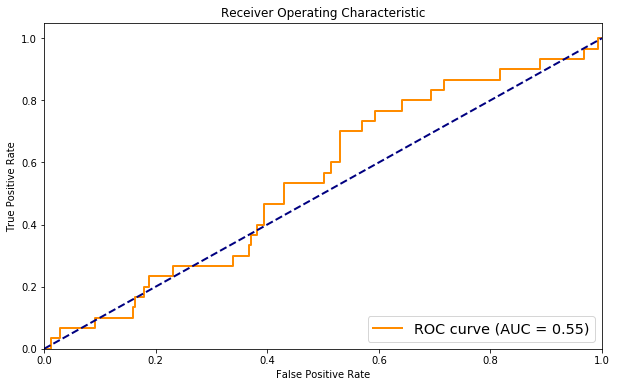

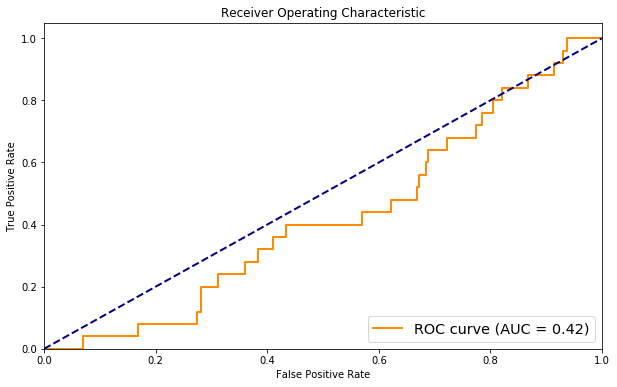

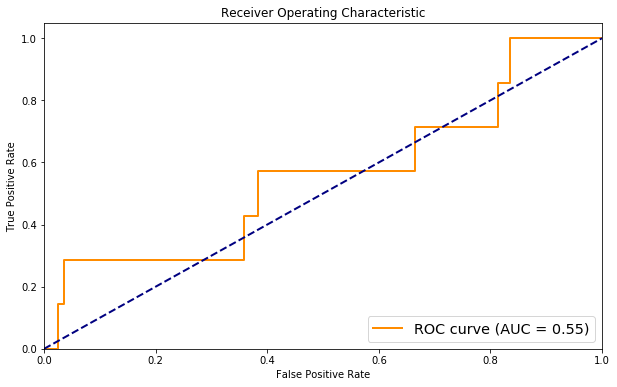

In [16]:
test_severity_0 = (test_y == 0)
_ = draw_roc_curve(test_severity_0, predALL_y)

test_severity_1 = (test_y == 1)
_ = draw_roc_curve(test_severity_1, predALL_y)

test_severity_2 = (test_y == 2)
_ = draw_roc_curve(test_severity_2, predALL_y)

test_severity_3 = (test_y == 3)
_ = draw_roc_curve(test_severity_3, predALL_y)

test_severity_4 = (test_y == 4)
_ = draw_roc_curve(test_severity_4, predALL_y)

The AUC scores of One vs Rest ROC curves shows that predicting recidivism_severity has mixed results. Severity= 0 has a really poor ROC curve, severity=4 has a great ROC curve while the rest are similar in accuracies to prediction of recidivism.

# Question 4

## Predict violent recidivism model

In [17]:
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism_violence_first_offence"]

test_X = pd.get_dummies(test[factors])
test_y = test["recidivism_violence_first_offence"]

In [18]:
for i in range(len(test_y)):
    if test_y.values[i]=='No violent' or test_y.values[i]=='Not applicable':
        test_y.values[i] = 'Others'

In [19]:
for i in range(len(train_y)):
    if train_y.values[i]=='No violent' or train_y.values[i]=='Not applicable':
        train_y.values[i] = 'Others'

In [20]:
model = LogisticRegression(solver='liblinear', multi_class="auto")
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
pred_logistic = model.predict(test_X)
accuracy = accuracy_score(test_y,pred_logistic)
print("Accuracy : ", accuracy)

Accuracy :  0.8362989323843416


## Predict non-violent recidivism model

In [22]:
train, test = train_test_split(df1, test_size=0.33)

In [23]:
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism_violence_first_offence"]

test_X = pd.get_dummies(test[factors])
test_y = test["recidivism_violence_first_offence"]

In [24]:
for i in range(len(test_y)):
    if test_y.values[i]=='Violent' or test_y.values[i]=='Not applicable':
        test_y.values[i] = 'Others'

In [25]:
for i in range(len(train_y)):
    if train_y.values[i]=='Violent' or train_y.values[i]=='Not applicable':
        train_y.values[i] = 'Others'

In [26]:
model = LogisticRegression(solver='liblinear', multi_class="auto")
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred_logistic = model.predict(test_X)
accuracy = accuracy_score(test_y,pred_logistic)
print("Accuracy : ", accuracy)

Accuracy :  0.800711743772242


**Yes the accuracy is better for these models**

# Question 5

In [28]:
train, test = train_test_split(df1, test_size=0.33)

In [29]:
train_X = pd.get_dummies(train[factors])
train_y = train["recidivism"]

test_X = pd.get_dummies(test[factors])
test_y = test["recidivism"]

# Current Model

In [30]:
model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

In [31]:
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y,y_pred)
print("Accuracy from Chatos model: ", accuracy)

Accuracy from Chatos model:  0.6797153024911032


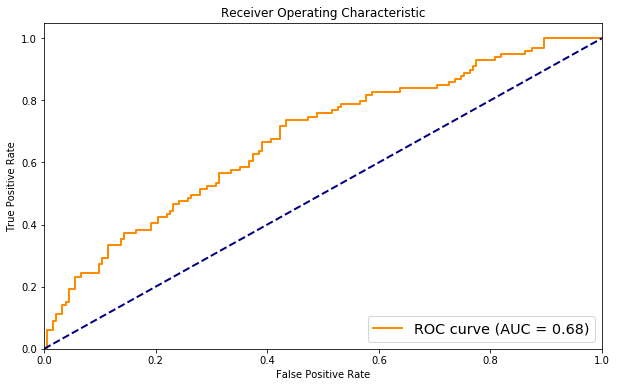

In [32]:
test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

## SVM implementation

In [33]:
model = SVC(probability=True, gamma='auto')
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

In [34]:
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y,y_pred)
print("Accuracy from Chatos model: ", accuracy)

Accuracy from Chatos model:  0.6476868327402135


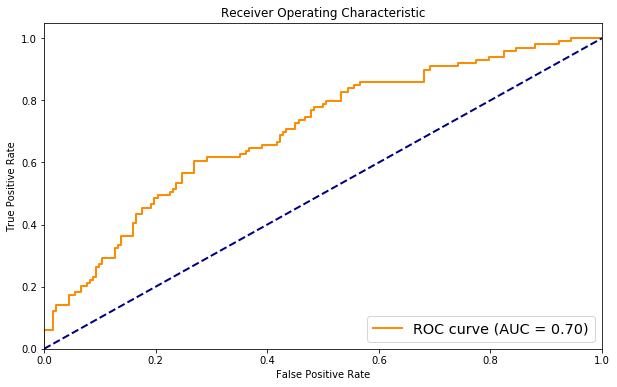

In [35]:
test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

# Decision Tree Classifier

In [36]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(train_X, train_y)
predALL_y = model.predict_proba(test_X)[:,1]

In [37]:
y_pred = model.predict(test_X)
accuracy = accuracy_score(test_y,y_pred)
print("Accuracy from Chatos model: ", accuracy)

Accuracy from Chatos model:  0.6476868327402135


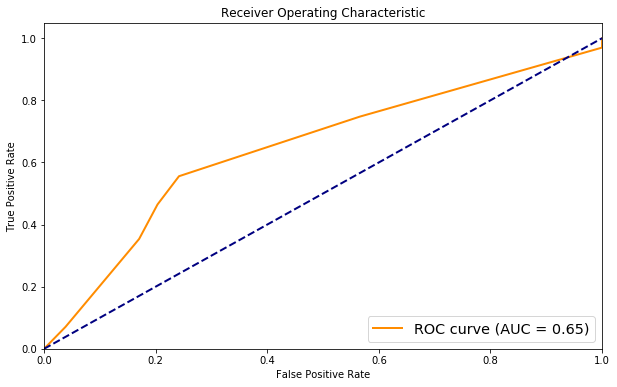

In [38]:
test_recidivism = (test_y == "Yes")
_ = draw_roc_curve(test_recidivism, predALL_y)

The AUC score of SVM classifier is highest and lowest for Decision Tree Classifier